<a href="https://colab.research.google.com/github/javiase/Grupo27-Practica1/blob/main/TrabajoFinalAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de herramientas

Para comenzar realizaremos todas las importaciones necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

#decisiontrees
from sklearn import tree
from sklearn import metrics

#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#traintest
from sklearn.model_selection import train_test_split

#crossval
from sklearn.model_selection import cross_val_score, KFold

# Importacion modelo de datos y Analisis exploratorio de datos

## Implementar modelo de datos

Implementamos el modelo de datos


In [2]:
datos = pd.read_csv("disp_st27ns1.txt.bz2", compression="bz2",index_col=0)
#comp_df = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)

In [3]:
pd.options.display.max_rows = 100
datos

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,228.161205,229.680077,246.582735,245.473409,0.0,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,244.348444,237.416203,184.462400,184.607586,0.0,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.674612,249.425982,259.792969,256.932908,0.0,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,227.978506,236.917554,268.096311,269.024766,0.0,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,262.343628,256.254039,263.650323,268.711556,0.0,10.909091,46.181818,94.363636,61.727273,11154900


Como se puede apreciar en la tabla la columna "uswrf_s1_1", solamente contiene ceros. Esto se puede deber a un problema en el sensor ya que en las localizaciones contiguas se han registrado números altos

In [4]:
datos.drop(['uswrf_s1_1'], axis=1)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,192.516803,246.504475,250.123907,256.887859,252.522390,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,231.473054,205.821899,202.754549,190.833872,193.689280,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,210.473835,232.919646,234.298932,207.450058,201.529466,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,227.330324,231.098594,234.944027,247.745764,241.867405,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,229.641681,228.161205,229.680077,246.582735,245.473409,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,224.630457,244.348444,237.416203,184.462400,184.607586,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.591119,245.674612,249.425982,259.792969,256.932908,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,240.584692,227.978506,236.917554,268.096311,269.024766,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,268.409674,262.343628,256.254039,263.650323,268.711556,10.909091,46.181818,94.363636,61.727273,11154900


## Comprobar valores nulos

A continuacion comprobaremos si existen valores nulos en alguna de las columnas

In [5]:
datos.isnull().sum()

apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
dlwrf_s1_1    0
dlwrf_s2_1    0
dlwrf_s3_1    0
dlwrf_s4_1    0
dlwrf_s5_1    0
dswrf_s1_1    0
dswrf_s2_1    0
dswrf_s3_1    0
dswrf_s4_1    0
dswrf_s5_1    0
pres_ms1_1    0
pres_ms2_1    0
pres_ms3_1    0
pres_ms4_1    0
pres_ms5_1    0
pwat_ea1_1    0
pwat_ea2_1    0
pwat_ea3_1    0
pwat_ea4_1    0
pwat_ea5_1    0
spfh_2m1_1    0
spfh_2m2_1    0
spfh_2m3_1    0
spfh_2m4_1    0
spfh_2m5_1    0
tcdc_ea1_1    0
tcdc_ea2_1    0
tcdc_ea3_1    0
tcdc_ea4_1    0
tcdc_ea5_1    0
tcolc_e1_1    0
tcolc_e2_1    0
tcolc_e3_1    0
tcolc_e4_1    0
tcolc_e5_1    0
tmax_2m1_1    0
tmax_2m2_1    0
tmax_2m3_1    0
tmax_2m4_1    0
tmax_2m5_1    0
tmin_2m1_1    0
tmin_2m2_1    0
tmin_2m3_1    0
tmin_2m4_1    0
tmin_2m5_1    0
tmp_2m_1_1    0
tmp_2m_2_1    0
tmp_2m_3_1    0
tmp_2m_4_1    0
tmp_2m_5_1    0
tmp_sfc1_1    0
tmp_sfc2_1    0
tmp_sfc3_1    0
tmp_sfc4_1    0
tmp_sfc5_1    0
ulwrf_s1_1    0
ulwrf_s2_1    0
ulwrf_s3

## Comprobar filas duplicadas

Vamos a comprobar si hay filas duplicadas:




In [6]:
datos.duplicated()

V1       False
V2       False
V3       False
V4       False
V5       False
         ...  
V4376    False
V4377    False
V4378    False
V4379    False
V4380    False
Length: 4380, dtype: bool

Se puede ver, que no hay ninguna fila duplicada, lo cual es buena señal

## Comprobar correlacion entre las variables y la salida, y entre las variables entre si

A continuación construimos la matriz de correlación para ver qué relevante es cada variable en la salida y para comprobar que dos variables no tengan un comportamiento muy similar(ante lo cual se eliminaría una de ellas)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
apcp_sf1_1,1.000000,0.601748,0.543781,0.277655,0.262666,0.264907,0.223553,0.190142,0.102332,0.085999,...,-0.357093,-0.311504,-0.172070,-0.150134,-0.067118,-0.188936,-0.244583,-0.158497,-0.130785,-0.210803
apcp_sf2_1,0.601748,1.000000,0.944655,0.403267,0.375560,0.218167,0.225368,0.200207,0.125191,0.110740,...,-0.422966,-0.403418,-0.265629,-0.229809,-0.057603,-0.220824,-0.316501,-0.246168,-0.207139,-0.234712
apcp_sf3_1,0.543781,0.944655,1.000000,0.549341,0.485724,0.225110,0.237400,0.214085,0.138392,0.123163,...,-0.431491,-0.427810,-0.325865,-0.286692,-0.044330,-0.223966,-0.342563,-0.298344,-0.253546,-0.261290
apcp_sf4_1,0.277655,0.403267,0.549341,1.000000,0.898837,0.214020,0.236931,0.226005,0.180157,0.168973,...,-0.315838,-0.338565,-0.374480,-0.374391,0.007243,-0.137082,-0.252470,-0.312784,-0.281925,-0.257081
apcp_sf5_1,0.262666,0.375560,0.485724,0.898837,1.000000,0.213648,0.238394,0.227495,0.189047,0.181595,...,-0.320049,-0.347333,-0.389766,-0.404853,-0.000891,-0.145067,-0.256692,-0.320720,-0.299890,-0.268527
dlwrf_s1_1,0.264907,0.218167,0.225110,0.214020,0.213648,1.000000,0.966002,0.953568,0.891560,0.877920,...,0.205955,0.209102,0.200702,0.230811,0.303236,0.377124,0.120764,-0.054888,0.117347,0.218264
dlwrf_s2_1,0.223553,0.225368,0.237400,0.236931,0.238394,0.966002,1.000000,0.993317,0.933113,0.919404,...,0.186767,0.183973,0.172107,0.204012,0.325223,0.367840,0.086127,-0.094005,0.087518,0.213598
dlwrf_s3_1,0.190142,0.200207,0.214085,0.226005,0.227495,0.953568,0.993317,1.000000,0.964093,0.952146,...,0.226316,0.219289,0.194408,0.225850,0.347867,0.423130,0.129628,-0.079860,0.107742,0.257677
dlwrf_s4_1,0.102332,0.125191,0.138392,0.180157,0.189047,0.891560,0.933113,0.964093,1.000000,0.996835,...,0.310307,0.300991,0.238058,0.262453,0.382675,0.538780,0.250681,-0.039036,0.149881,0.355938
dlwrf_s5_1,0.085999,0.110740,0.123163,0.168973,0.181595,0.877920,0.919404,0.952146,0.996835,1.000000,...,0.322502,0.313870,0.247906,0.266319,0.392027,0.561208,0.279531,-0.014985,0.169544,0.380239


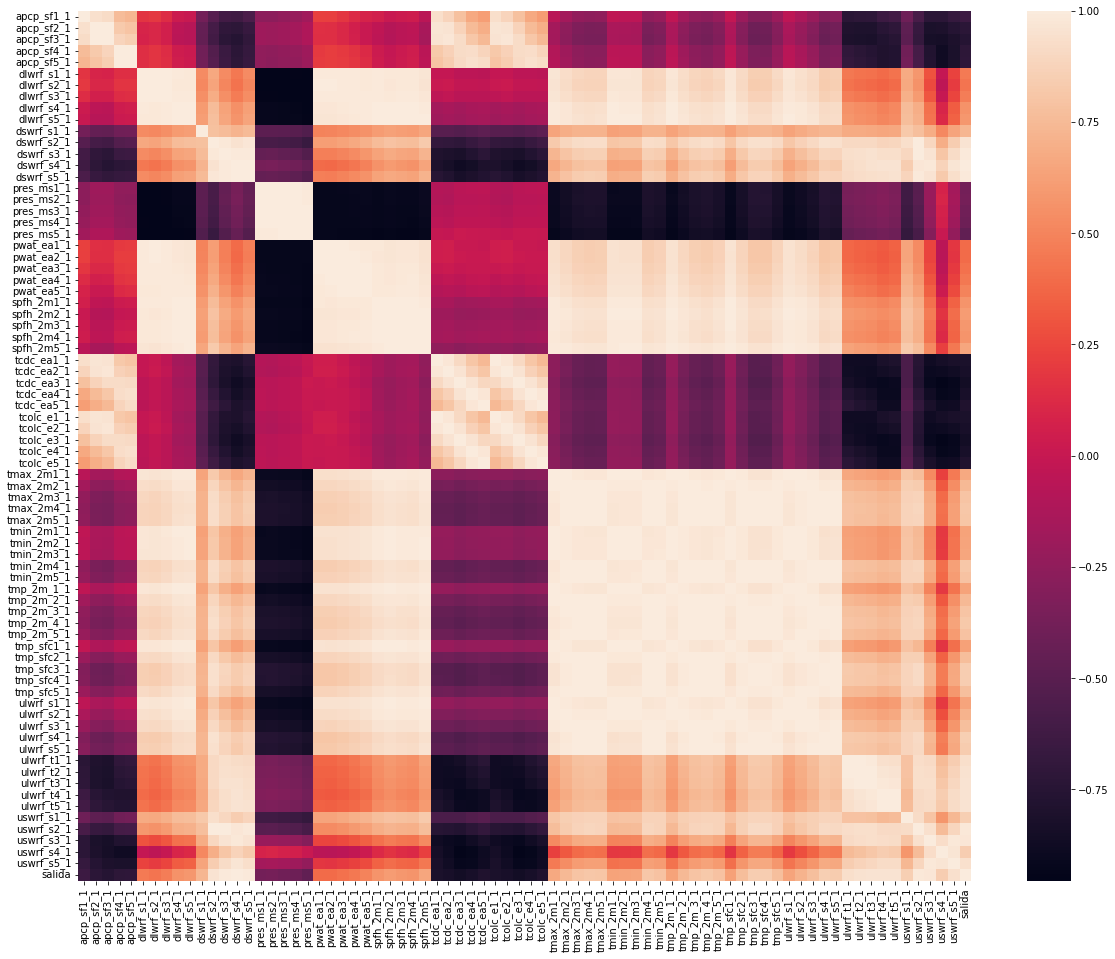

In [9]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.corr())
correlacion

A continuacion vamos a encontrar los atributos que están correlacionados con más atributos

In [ ]:
trigger = False
arr = []
for x in datos.columns:
  trigger = True
  for y in datos.columns:
    if(x==y):
      trigger = False
    if (trigger and correlacion[x][y]>0.95):
        arr.append(x)
for x in datos.columns:
  print(x, arr.count(x))


apcp_sf1_1 0
apcp_sf2_1 0
apcp_sf3_1 0
apcp_sf4_1 0
apcp_sf5_1 0
dlwrf_s1_1 0
dlwrf_s2_1 1
dlwrf_s3_1 2
dlwrf_s4_1 1
dlwrf_s5_1 2
dswrf_s1_1 0
dswrf_s2_1 0
dswrf_s3_1 1
dswrf_s4_1 0
dswrf_s5_1 1
pres_ms1_1 0
pres_ms2_1 1
pres_ms3_1 2
pres_ms4_1 2
pres_ms5_1 2
pwat_ea1_1 0
pwat_ea2_1 1
pwat_ea3_1 2
pwat_ea4_1 2
pwat_ea5_1 2
spfh_2m1_1 0
spfh_2m2_1 1
spfh_2m3_1 2
spfh_2m4_1 2
spfh_2m5_1 2
tcdc_ea1_1 0
tcdc_ea2_1 0
tcdc_ea3_1 0
tcdc_ea4_1 0
tcdc_ea5_1 0
tcolc_e1_1 1
tcolc_e2_1 1
tcolc_e3_1 1
tcolc_e4_1 1
tcolc_e5_1 1
tmax_2m1_1 0
tmax_2m2_1 1
tmax_2m3_1 1
tmax_2m4_1 2
tmax_2m5_1 3
tmin_2m1_1 2
tmin_2m2_1 3
tmin_2m3_1 4
tmin_2m4_1 4
tmin_2m5_1 5
tmp_2m_1_1 5
tmp_2m_2_1 11
tmp_2m_3_1 7
tmp_2m_4_1 8
tmp_2m_5_1 9
tmp_sfc1_1 7
tmp_sfc2_1 13
tmp_sfc3_1 11
tmp_sfc4_1 12
tmp_sfc5_1 13
ulwrf_s1_1 7
ulwrf_s2_1 18
ulwrf_s3_1 18
ulwrf_s4_1 15
ulwrf_s5_1 16
ulwrf_t1_1 0
ulwrf_t2_1 0
ulwrf_t3_1 1
ulwrf_t4_1 0
ulwrf_t5_1 1
uswrf_s1_1 0
uswrf_s2_1 2
uswrf_s3_1 0
uswrf_s4_1 0
uswrf_s5_1 1
salida 0


la parte a continuación es una prueba, donde intentamos eliminar aquellos que estan correlacionados con varios (esta bien esa idea?)

In [ ]:
#vamos a eliminar las columnas que estén correlacionadas con 10 o más elementos
pd.options.display.max_columns = 100
for x in datos.columns:
  if (arr.count(x)>=10):
    datos.drop([x], axis=1)
    print(x)
datos

tmp_2m_2_1
tmp_sfc2_1
tmp_sfc3_1
tmp_sfc4_1
tmp_sfc5_1
ulwrf_s2_1
ulwrf_s3_1
ulwrf_s4_1
ulwrf_s5_1


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,0.0,40.000000,220.000000,480.000000,300.000000,101672.562500,101860.985795,101952.561080,101899.061790,102053.573864,8.379193,8.427273,8.906254,9.954545,10.091506,0.004494,0.003843,0.004088,0.004164,0.003930,0.002727,0.001818,0.000000,0.000000,0.001818,0.003055,0.002082,0.001536,0.001373,0.002927,278.017059,277.363806,282.518674,282.854415,282.858537,276.702567,275.726252,275.728360,282.473322,277.742409,276.721979,277.375841,282.515511,282.513777,277.744501,275.278376,277.359475,285.344946,284.087003,275.954629,331.394958,323.977009,342.171581,375.955872,362.099407,192.516803,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,0.0,22.727273,113.636364,243.636364,156.363636,101607.410511,101421.308239,101292.955256,101027.313920,101138.385653,11.297975,12.541862,12.968446,13.813590,14.678820,0.003804,0.003991,0.004357,0.004682,0.004836,0.038182,0.209091,0.267273,0.266364,0.325455,0.039218,0.208991,0.266245,0.266709,0.324691,274.940507,276.517922,280.845853,282.706679,282.779766,274.464375,274.484258,274.484258,280.944280,279.465623,274.518985,276.534024,280.840962,282.702004,279.489560,273.184556,276.887645,282.685328,283.107297,277.932528,315.796279,321.354673,335.433910,365.290494,358.046531,231.473054,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,0.0,31.818182,181.818182,395.454545,247.727273,101964.796165,101992.826705,101932.295455,101649.426136,101573.051847,8.535861,6.894892,6.790909,8.154545,8.845455,0.002550,0.002594,0.002920,0.003118,0.003001,0.031818,0.018182,0.032727,0.105455,0.156364,0.030164,0.017891,0.033482,0.106945,0.157136,274.444636,270.247062,272.922150,274.373147,274.385290,269.634216,269.515908,269.514618,272.985432,271.773779,269.700512,270.230641,272.919004,274.371876,271.848575,269.669422,271.081906,275.987263,276.386444,270.951871,306.821664,300.933780,310.250763,332.520954,325.133029,210.473835,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,0.0,30.909091,192.727273,471.818182,301.636364,101864.192472,102192.869318,102445.835227,102456.352983,102554.223722,9.608086,8.705322,7.081085,6.431813,6.230020,0.002647,0.002860,0.002918,0.003021,0.002927,0.034545,0.015455,0.007273,0.002727,0.014545,0.033191,0.015727,0.006891,0.003236,0.015173,272.386960,273.031461,276.459539,277.577639,277.562941,270.261846,271.885501,271.879619,276.561171,272.053880,272.348791,273.036618,276.468661,277.317008,272.032826,271.952040,273.830070,280.555054,279.435311,270.155393,303.401880,310.397927,323.941842,352.661424,338.072865,227.330324,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.0

Vamos a ver cuales tienen mejor o peor correlacion con la variable de salida

In [ ]:
lista = []
count = 0
for x in correlacion["salida"]:
  if (x<0.5 and x>-0.5):
    lista.append(x)

AttributeError: ignored